In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [556]:
df = pd.read_csv("../Dataset/diabetes.csv")

In [557]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [559]:
def imputer(data,col):
    mean = data[col].median()
    data[col] = np.where(data[col] == 0, mean ,data[col])
    return data

In [560]:
df.columns[1:6]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [561]:
for x in df.columns[1:6]:
    df = imputer(df,x)

In [562]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47,1


In [563]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

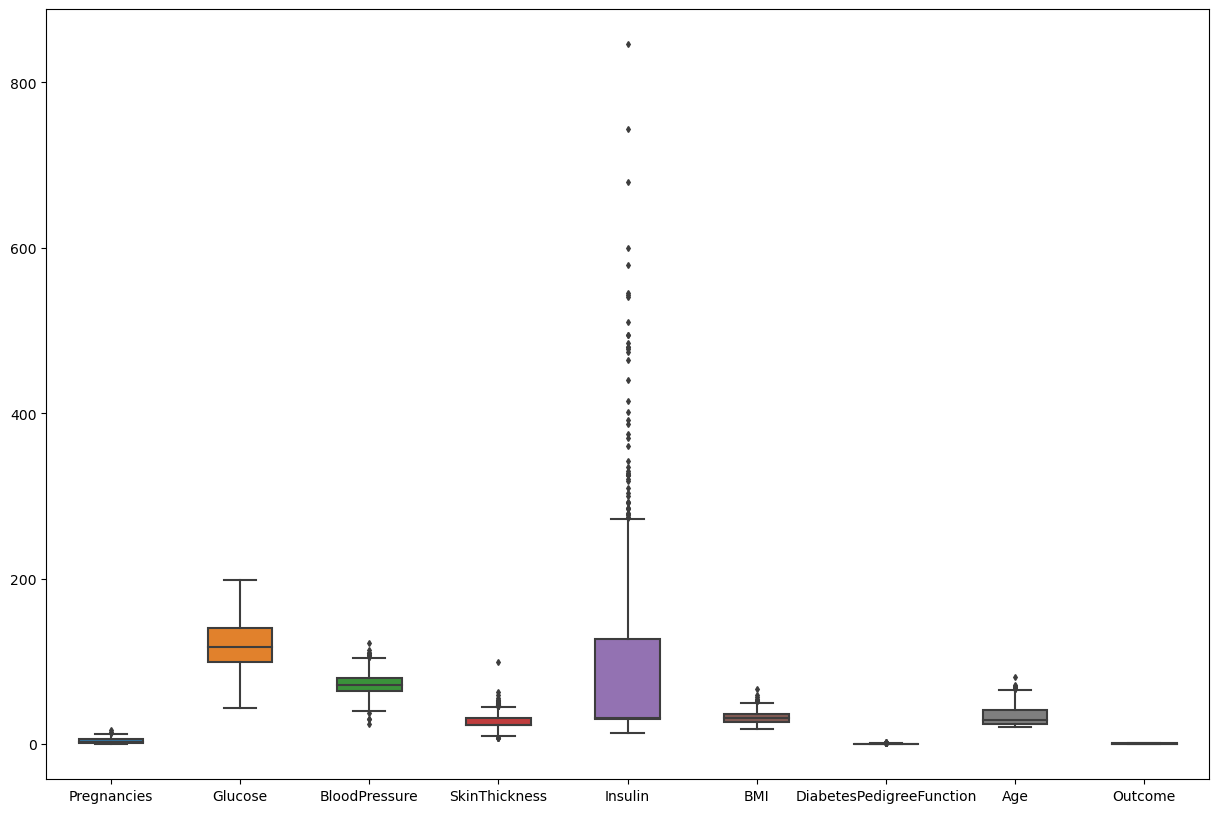

In [564]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [565]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [566]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [567]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [568]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [569]:
import warnings
warnings.filterwarnings('ignore')
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty':[ 'elasticnet', 'l1', 'l2'],'C':np.logspace(-3,3,7),}


grid_search = GridSearchCV(estimator = LogisticRegression(),param_grid = parameters, scoring = 'accuracy', cv = 5)

In [570]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [571]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [572]:
grid_search.best_score_

0.7708245877061469

In [573]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(X_test)

In [574]:
grid_search.score(X_test,y_test)

0.7916666666666666

In [575]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



In [576]:
import pickle
with open("../model/logistic_model.pkl", "wb") as f:
    pickle.dump(grid_search,file=f)
    f.close()
with open("../model/scaler_model.pkl", "wb") as f:
    pickle.dump(scaler,file=f)